(100, 100, 3) 40 43
(100, 100) 40 43


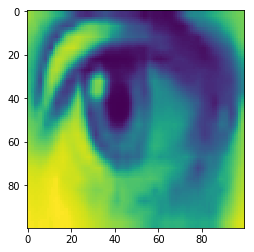

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
data_set = np.load('./data/arrayN.npy')

scale = 1

print(data_set[0][0].shape, data_set[0][1], data_set[0][2])

for im in data_set:
  im[0] = cv2.resize(im[0],None, None, scale, scale)
  im[0] = cv2.cvtColor(im[0], cv2.COLOR_BGR2GRAY)
  im[0] = cv2.equalizeHist(im[0])
  im[1] = int(im[1]*scale)
  im[2] = int(im[2]*scale)

plt.imshow(data_set[0][0])
print(data_set[0][0].shape, data_set[0][1], data_set[0][2])

In [3]:
X_ = data_set[:,0:1]
Y_ = data_set[:,1:5]

Xx = []
Y = []

for x in X_:
    Xx.append(x[0] * 1. /255)
    
Xx = np.array(Xx)    
Y = np.array(Y_)

Y *= 1. / (100 * scale)

X = Xx[...,np.newaxis]

print(len(X),X.shape)
print(len(Y),Y.shape)

2013 (2013, 100, 100, 1)
2013 (2013, 4)


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
np.random.seed(58)

C:\Users\Bartosz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(int(100*scale),int(100*scale),1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('linear'))

model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 256)       295168    
_________________________________________________________________
activation_2 (Activation)    (None, 49, 49, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 256)       0         
__________

In [6]:
model.fit(X, Y, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

Train on 1610 samples, validate on 403 samples
Epoch 1/200
1610/1610 [==============================] - 8s 5ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918
Epoch 2/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - val_loss: 0.0756 - val_mean_absolute_error: 0.0756
Epoch 3/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - val_loss: 0.1018 - val_mean_absolute_error: 0.1018
Epoch 4/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - val_loss: 0.0767 - val_mean_absolute_error: 0.0767
Epoch 5/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - val_loss: 0.0829 - val_mean_absolute_error: 0.0829
Epoch 6/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - va

1610/1610 [==============================] - 5s 3ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - val_loss: 0.0366 - val_mean_absolute_error: 0.0366
Epoch 50/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365
Epoch 51/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353
Epoch 52/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371
Epoch 53/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - val_loss: 0.0366 - val_mean_absolute_error: 0.0366
Epoch 54/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370
Epoch

Epoch 98/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370
Epoch 99/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 100/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381
Epoch 101/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 102/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0378 - val_mean_absolute_error: 0.0378
Epoch 103/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0363 - val_mean_absolute_er

1610/1610 [==============================] - 5s 3ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368
Epoch 147/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0366 - val_mean_absolute_error: 0.0366
Epoch 148/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 149/200
1610/1610 [==============================] - 4s 3ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369
Epoch 150/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0361 - val_mean_absolute_error: 0.0361
Epoch 151/200
1610/1610 [==============================] - 4s 3ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354


1610/1610 [==============================] - 4s 3ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 195/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0381 - val_mean_absolute_error: 0.0381
Epoch 196/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 197/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0372 - val_mean_absolute_error: 0.0372
Epoch 198/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0361 - val_mean_absolute_error: 0.0361
Epoch 199/200
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0373 - val_mean_absolute_error: 0.0373


In [7]:
model.save('modelN.h5')
model.save_weights('weightsN.h5')